In [1]:
import pandas as pd
import ast
from collections import Counter

import os

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
import spacy
import en_core_web_sm
from collections import OrderedDict

ImportError: No module named 'en_core_web_sm'

In [4]:
import json
import collections
import os 
import time
import random

In [5]:
df = pd.read_csv("search_results_v2.csv")

In [6]:
df.head()

,claim_id,found_doc,rank,percentage,weight
0,3,Chris_Hemsworth,1,63,35.874716
1,3,Hemsworth_-LRB-surname-RRB-,2,47,26.919077
2,3,Kim_Hyde,3,39,22.099664
3,3,Liam_Hemsworth,4,38,21.552361
4,3,Vanessa_Zachos,5,37,21.329802


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
r_mask = df["rank"] <3

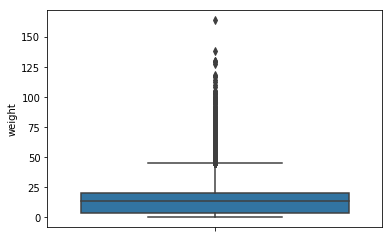

In [39]:
sns.boxplot(y=df[r_mask]["weight"])

In [15]:
df.iloc[0]["text"]

'Firefox OS was designed to provide a complete, community-based alternative operating system, for running web applications directly or those installed from an application marketplace .'

In [141]:
percent_mask = df["percentage"] > 50
df_1 = df[percent_mask]
weight_mask = df_1["weight"] > 8

In [142]:
df_1 = df_1[weight_mask]

In [143]:
df_1.shape

(183460, 7)

In [7]:
file = "test-unlabelled.json"
with open(file) as train_file:
    test = json.load(train_file)

In [151]:
df_1["claim"] = df_1["claim_id"].apply(lambda x: test[str(x)]["claim"])

In [152]:
df_1.head()

,claim_id,found_doc,sent_id,rank,percentage,weight,text,claim
0,6,Firefox_OS,5,1,80,18.63,"Firefox OS was designed to provide a complete, community-based alternative operating system, for...",Firefox is an application.
5,6,XUL,9,1,80,15.54,"Waterfox, another fork of Firefox for Windows, macOS, and Linux is planning continued developmen...",Firefox is an application.
6,6,XUL,8,2,52,10.14,"Pale Moon, a fork of Firefox for Windows and Linux, will continue to support XUL indefinitely .",Firefox is an application.
10,6,Firefox_3.5,0,1,60,16.12,"Mozilla Firefox 3.5 is a version of the Firefox web browser released in June 2009, adding a vari...",Firefox is an application.
15,6,Firefox_Portable,0,1,60,16.71,"Mozilla Firefox, Portable Edition (formerly known as Portable Firefox and commonly known as Fire...",Firefox is an application.


In [154]:
df_1.rename(columns={"text":"evidence","claim_id":"ID"},inplace=True)

In [156]:
df_1.to_csv("test_set_filtered_.csv",index=False)

In [157]:
df_1.shape

(183460, 8)

In [149]:
df.head()

,claim_id,found_doc,sent_id,rank,percentage,weight,text
0,6,Firefox_OS,5,1,80,18.63,"Firefox OS was designed to provide a complete, community-based alternative operating system, for..."
1,6,Firefox_OS,1,2,49,11.47,"It is based on the rendering engine of the Firefox web browser, Gecko, and on the Linux kernel ."
2,6,Firefox_OS,0,3,40,9.42,"Firefox OS (project name : Boot to Gecko, also known as B2G) is a discontinued open-source opera..."
3,6,Firefox_OS,8,4,39,9.19,"In December 2015 Mozilla announced it would stop development of new Firefox OS smartphones, and ..."
4,6,Firefox_OS,7,5,35,8.35,"As such, Mozilla with Firefox OS competed with commercially developed operating systems such as ..."


In [8]:
df.shape

(1428209, 7)

In [5]:
# Utils 

In [9]:
keys = list(test.keys())

In [11]:
from tqdm import tqdm

In [12]:
all_dfs = []
for key in tqdm(keys):
    all_dfs.append(df[df.claim_id==int(key)])

100%|██████████| 14997/14997 [04:52<00:00, 52.15it/s]


In [13]:
test_df = pd.concat(all_dfs)

In [15]:
test_df["claim"] = test_df["claim_id"].apply(lambda x: test[str(x)]["claim"])

In [17]:
test_df.to_csv("test_docs_top100.csv",index=False)

In [22]:
mask = test_df["rank"] < int(8)

In [23]:
test_df = test_df[mask]

In [24]:
test_df.shape

(104979, 6)

In [25]:
file = "wiki.json"
with open(file) as train_file:
    wiki = json.load(train_file)

In [28]:
dict_train = test_df.to_json(orient='index')

In [31]:
import json

In [33]:
dict_train = json.loads(dict_train)

In [41]:
list(dict_train.items())[]

('10016172',
 {'claim': 'SummerSlam was promoted by WWE in 2015.',
  'claim_id': 137129,
  'found_doc': 'NXT_TakeOver-COLON-_Brooklyn',
  'percentage': 54,
  'rank': 3,
  'weight': 28.2813489992})

In [5]:
def extract_final_text_from_line(line):
    # use this function to extarct the text from a line in data-file
    #try:
    line_list =line.split(" ")
    page_id = line_list.pop(0)
    page_name = " ".join(page_id.split("_"))
    sentence_id = 12345
    if not line_list:
        return " "
    if line_list[0].isnumeric():
        sentence_id = line_list.pop(0)
    line = " ".join(line_list)
    return (sentence_id, line)

In [6]:
import unicodedata

def strip_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')

In [4]:
import ast

In [5]:
ast.literal_eval("[12,2,3]")

[12, 2, 3]

In [25]:
def ret_func(df):
    ls = []
    for i in ast.literal_eval(df["doc_evidence"]):
        sen_i, line = extract_final_text_from_line(i)
        dff["evidence"] = line
        dff["sentence_id"] =sen_i
        dff["claim"] = df.claim
        dff["document"] = df.found_doc
        dff["rank"] = df['rank']
        dff["claim_id"] = df.claim_id
        ls.append(dff)
    return pd.concat(ls)
        

In [7]:
from pandarallel import pandarallel

In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
tqdm.pandas()

In [7]:
dff = pd.read_csv("test_top10.csv")a

In [8]:
dff["doc_evidence"] = dff["doc_evidence"].apply(lambda x: ast.literal_eval(x))

In [9]:
dff_json = dff.to_dict(orient='index')

In [17]:
cols = []
for key,item in tqdm(dff_json.items()):
    for i in item["doc_evidence"]:
        d = {}
        sen_i, line = extract_final_text_from_line(i)
        d["evidence"] = line
        d["sentence_id"] =sen_i
        d["claim"] = item["claim"]
        d["document"] = item["found_doc"]
        d["rank"] = item['rank']
        d["claim_id"] = item["claim_id"]
        cols.append(d)
        
        
    

100%|██████████| 104979/104979 [01:52<00:00, 933.12it/s] 


In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(cols)

In [20]:
df.shape

(35324033, 6)

In [23]:
df = df.drop_duplicates()

In [27]:
df.shape

(793308, 6)

In [24]:
df.to_csv("test_search_top_10.csv",index=False)

In [ ]:
df.head(10)

In [194]:
class BaseTask():
    def __init__(self):
        self.nlp = en_core_web_sm.load()
        
    def get_POS_tags_list(self, text):
        docs = self.nlp(text)
        pos_list = []
        for word in docs:
            pos_list.append((word.text,word.pos_))

        return pos_list
    def get_enitities_list(self, text):
        docs = self.nlp(text)
        entities_dict = {word: word.label_ for word in docs.ents}
        return entities_dict
    
    def tokenise_and_lower(self, text):
        docs = self.nlp(text)
        tokens = []
        for word in docs:
            tokens.append(str(word).lower())
        return tokens
                        
    
    def grab_evidence_text(self, ID):
        ID = ID.strip()
        !grep -r ID /Users/hima95/Downloads/wiki-pages-text/ >> search.txt
        fp = open("./search.txt",'r')
        text = fp.readlines()
        fp.close()
        os.remove("./search.txt")
        return text
    
    def extract_final_text_from_line(self, line):
        # use this function to extarct the text from a line in data-file
        #try:
        line_list =line.split(" ")
        page_id = line_list.pop(0)
        page_name = " ".join(page_id.split("_"))
        sentence_id = 12345
        if not line_list:
            return " "
        if line_list[0].isnumeric():
            sentence_id = line_list.pop(0)
        return " ".join(line_list)
        #except:
        #    print("Something went wrong")

    
    def longest_common_sequence(self, t1, t2):
        tkns1, tkns2 = t1.split(), t2.split()
        counter = collections.defaultdict(dict)
        for i in range(-1, len(tkns1)):
            for j in range(-1, len(tkns2)):
                if i == -1 or j == -1:
                    counter[i][j] = 0
                else:
                    if tkns1[i] == tkns2[j]:
                        counter[i][j] = counter[i - 1][j - 1] + 1
                    else:
                        counter[i][j] = max(counter[i - 1][j], counter[i][j - 1])
        return counter[len(tkns1) - 1][len(tkns2) - 1]



In [195]:
class PosCountsTask(BaseTask):
    def __init__(self,df):
        self.df = df
        self.desired_pos = ["NOUN", "PROPN", "VERB", "ADJ"]
        self.grammar_pos = ["INTJ", "CCONJ", "AUX", "PUNCT","PART","SCONJ","DET","SYM", "NUM"]
        super().__init__()
        
    def make_pos_counts(self, text, pos_tag):
        docs = self.nlp(text)
        counts = Counter()
        for word in docs:
            counts[word.pos_] += 1
        # combine all counts of other grammar words than the desired list
        counts2 = Counter()
        for pos in counts.keys():
            if pos in self.grammar_pos:
                counts2["other_pos_counts"] += counts[pos]
        
        if pos_tag in counts2.keys():
            return counts2[pos_tag]
        elif pos_tag in counts.keys():
            return counts[pos_tag]
        else:
            return 0
    
    def make_counts_fields(self):
        df = self.df
        for pos in self.desired_pos:
            field_name = spacy.explain(pos) + "_counts"
            df[field_name] = df["claim"].apply(lambda x: self.make_pos_counts(x,pos))
            
        df["other_pos_counts"] = self.df["claim"].apply(lambda x: 
                                                           self.make_pos_counts(x,"other_pos_counts"))
        return df
        
    

In [196]:
class KeywordsAndEntityTask(BaseTask):
    def __init__(self,df):
        self.df = df
        self.key_pos = ["NOUN", "PROPN", "SYM", "NUM","ADJ"]
        super().__init__()
        
    def extract_keyword_list(self, claim):
        # Pick all the Entities and the key POS in the list 

        ents = self.get_enitities_list(claim)

        pos = self.get_POS_tags_list(claim)

        pos_filtered = [(key,value) for key,value in pos if value in self.key_pos]

        ents_list = list(ents.keys())
        ents_list = [str(item) for item in ents_list]
        # pos list of the entities
        pos_of_ents = self.get_POS_tags_list(" ".join(ents_list))
        pos_of_ents = [key for key,value in pos_of_ents]
        # list of all filtered pos
        pos_list = [key for key,value in pos_filtered] 
        # keywords not in entities
        other_keywords = [word for word in pos_list if word not in pos_of_ents]

        final_key_words = ents_list + other_keywords
        return final_key_words
    
    def caliculate_keywords_len(self):
        df = self.df
        
        df["keyword_count"] = df["claim"].apply(lambda x: len(self.extract_keyword_list(x)))
        return df 
    
    def keywords_similarity(self, claim, candidate_sent):
        # caliculate similarity b/w claim and candidate sentence using only thier key words
        clm = self.nlp(" ".join(self.extract_keyword_list(claim)))
        evdc = self.nlp(" ".join(self.extract_keyword_list(candidate_sent)))
        return clm.similarity(evdc)
        
    def common_keywords_count(self, claim, candidate_sent):
        clm = [item.lower().strip() for item in self.extract_keyword_list(claim)]
        evdc = [item.lower().strip() for item in self.extract_keyword_list(candidate_sent)]
        return len(list(set(evdc).intersection(clm)))
    
    def caliculate_jacards_similarity(self, claim,evidence):
        # caliculate the jacards similarity betwen keywords of the two sentences
        claim = self.extract_keyword_list(claim)
        evidence = self.extract_keyword_list(evidence)
        intersection = set(evidence).intersection(set(claim))
        union = set(claim).union(set(evidence))
        return len(intersection)/len(union)
    
        
    

# Feature Engineering

In [9]:
import json
import glob
import os 
import time
import random

In [10]:
file = 'testset_query_results.json'
with open(file) as train_file:
    test = json.load(train_file)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("search_results_v2_ner_index.csv")

In [4]:
df.shape

(16544416, 5)

In [5]:
df.head()

,claim_id,found_doc,rank,percentage,weight
0,3,Chris_Hemsworth,1,63,35.874716
1,3,Hemsworth_-LRB-surname-RRB-,2,47,26.919077
2,3,Kim_Hyde,3,39,22.099664
3,3,Liam_Hemsworth,4,38,21.552361
4,3,Vanessa_Zachos,5,37,21.329802


In [7]:
top_2 = df['rank'].apply(lambda x: True if x in [1,2] else False)

In [32]:
file = "test-unlabelled.json"
with open(file) as train_file:
    test = json.load(train_file)

In [33]:
ids = list(test.keys())

In [34]:
def filter_test_results(item):
    if str(item) in ids:
        return True
    else:
        return False

In [35]:
df_1 = df[top_2]

In [37]:
test_results = df_1.claim_id.apply(filter_test_results)

In [38]:
df_1 = df_1[test_results]

In [40]:
df_1.shape

(29994, 5)

In [41]:
df_1.to_csv("test_search_top2.csv",index=False)

## Clean the evidence text first add the page name if not present in the evidence text

In [197]:
from tqdm import tqdm

In [21]:
file = "devset_query_results.json"
with open(file) as train_file:
    dev = json.load(train_file)

In [22]:
# making data_set for attentions model

In [24]:
k = BaseTask()
final_dict = {}
for key,val in tqdm(dev.items()):
    #print(key)
    if val["evidence"]:
        evidence = ""
        corr = val["gold_evidence"]
        for i in corr:
            evidence = evidence + " " + k.extract_final_text_from_line(i)
        final_dict[key] = {}
        final_dict[key]["label"] = val["label"]
        final_dict[key]["claim"] = val["claim"]
        final_dict[key]["evidence"] = evidence

100%|██████████| 5001/5001 [00:00<00:00, 86758.24it/s]


In [25]:
with open('devset_NN_.json',"w") as train_file:
    json.dump(final_dict, train_file,indent=0)

In [12]:

k = BaseTask()
for key,val in tqdm(dev.items()):
    #print(key)
    if val["evidence"]:
        corr = val["gold_evidence"]
        wrong = val["wrong_evidence"]
        corr = [k.extract_final_text_from_line(i) for i in corr]
        wrong = [k.extract_final_text_from_line(i) for i in wrong]
        wrong_sample = random.sample(wrong,len(corr))
        dev[key]["wrong_evidence"] = wrong_sample
        dev[key]["gold_evidence"] = corr

100%|██████████| 5001/5001 [1:16:02<00:00,  1.10it/s]  


In [13]:
with open('devset_query_results1.json',"w") as train_file:
    json.dump(dev, train_file,indent=0)

In [10]:
# generating train csv for MLU

In [13]:
from tqdm import tqdm

In [14]:
file = "MLU_train_sample.json"
with open(file) as train_file:
    dev = json.load(train_file)

In [15]:
k = BaseTask()
cols =[]
for key,val in tqdm(dev.items()):
    claim = val["claim"]
    evd = val["evidence_text"]  
    evd_p = [k.extract_final_text_from_line(i) for i in val["evidence_text"]]
    evd_p = " ".join(evd_p)
    cols_dict = {"claim":claim,"evidence":evd_p,"ID":key,"label":val["label"]}
    cols.append(cols_dict)

100%|██████████| 24000/24000 [20:45<00:00, 20.98it/s] 


In [16]:
df = pd.DataFrame(cols)

In [20]:
df.to_csv("train_data.csv",index=False)

In [68]:
df.shape

(24000, 4)

In [18]:
df_sup = df[df["label"]=="SUPPORTS"]

In [19]:
df_sup.shape

(80035, 5)

In [20]:
df_ref = df[df["label"]=="REFUTES"]

In [21]:
df_ref.shape

(29775, 5)

In [22]:
df_not = df[df["label"]=="NOT ENOUGH INFO"]

In [24]:
#boostratp sample
# scikit-learn bootstrap
from sklearn.utils import resample
# prepare bootstrap sample
df_sup = resample(df_sup, replace=False, n_samples=12000, random_state=123)
df_ref = resample(df_ref, replace=False, n_samples=12000, random_state=123)

In [25]:
df1 = pd.concat([df_sup,df_ref],axis=0)

In [27]:
df1.to_json("MLU_train_sample.json",orient='index')

In [42]:
df1.to_csv("bootstrap_train_MLU.csv",index=False)

In [12]:
from tqdm import tqdm

In [17]:
file = 'testset_query_results.json'
with open(file) as train_file:
    dev = json.load(train_file)

In [18]:
k = BaseTask()
cols =[]
for key,val in tqdm(dev.items()):
    claim = val["claim"]
    evd = val["evidence"]
    evd_p = [k.extract_final_text_from_line(i) for i in val["evidence"]]
    for item,item_p in zip(evd,evd_p):
        line_list =item.split(" ")
        page_id = line_list.pop(0)
        sentence_id = 123
        if line_list[0].isnumeric():
            sentence_id = line_list.pop(0)
        cols_dict = {"claim":claim,"evidence":item_p,"ID":key,"evidence_id":[page_id,sentence_id]}
        cols.append(cols_dict)

100%|██████████| 14997/14997 [1:36:19<00:00,  2.14it/s]  


In [19]:
df = pd.DataFrame(cols)

In [20]:
df.shape

(236023, 4)

In [69]:
df = pd.read_csv("bootstrap_train_MLU.csv")

In [3]:
df = pd.read_csv("test_evidencePairs_top2.csv")

In [4]:
df.shape

(236023, 4)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(236023, 4)

In [72]:
# Parallel Processing 

In [73]:
import pandas as pd
from pandarallel import pandarallel

In [74]:
pandarallel.initialize(nb_workers=2)

New pandarallel memory created - Size: 2000 MB
Pandarallel will run on 2 workers


In [75]:
k = BaseTask()
key = KeywordsAndEntityTask(df=None) 
def make_jacards_features(tup):
    claim,evidence = tup
    claim = k.extract_final_text_from_line(claim)
    evidence = k.extract_final_text_from_line(evidence)
    return key.caliculate_jacards_similarity(claim,evidence)
def make_keywords_similarity_features(tup):
    claim,evidence = tup
    claim = k.extract_final_text_from_line(claim)
    evidence = k.extract_final_text_from_line(evidence)
    return key.keywords_similarity(claim,evidence)
def make_common_key_words_count(tup):
    claim,evidence = tup
    claim = k.extract_final_text_from_line(claim)
    evidence = k.extract_final_text_from_line(evidence)
    return key.common_keywords_count(claim,evidence)
def make_lcs(tup):
    claim,evidence = tup
    claim = k.extract_final_text_from_line(claim)
    evidence = k.extract_final_text_from_line(evidence)
    return k.longest_common_sequence(claim,evidence)




In [76]:
%%time
df["Jacards_Similarity"]  = df[['claim', 'evidence']].apply(make_jacards_features,axis=1)
df["Keywords_Similarity"]  = df[['claim', 'evidence']].apply(make_keywords_similarity_features,axis=1)
df["common_keywords"]  = df[['claim', 'evidence']].apply(make_common_key_words_count,axis=1)
df["LCS"]  = df[['claim', 'evidence']].apply(make_lcs,axis=1)

KeyboardInterrupt: 

In [77]:
df.to_csv("bootstrap_train_MLU.csv",index=False)

In [19]:
df.head()

,ID,claim,evidence,label
0,25683,David Dhawan works on Hindi films.,David Dhawan -LRB- born Rajinder Dhawan on 16 August 1955 -RRB- is an Indian film director who w...,SUPPORTS
1,5307,Pink Floyd's principal songwriter was Syd Barrett.,"Roger Keith `` Syd '' Barrett -LRB- 6 January 1946 -- 7 July 2006 -RRB- was a British musician ,...",SUPPORTS
2,2483,Neil Armstrong was in the first in-flight space emergency.,Neil Armstrong This mission was aborted after Armstrong used some of his reentry control fuel to...,SUPPORTS
3,40881,Emilio Estevez is a human.,"Emilio Estevez He is also known for Repo Man , The Mighty Ducks and its sequels , Stakeout , Max...",SUPPORTS
4,227607,Born This Way drew criticism from Asian communities.,Born This Way -LRB-song-RRB- The lyrics discuss the self-empowerment of minorities including the...,SUPPORTS


In [ ]:
k.extract_final_text_from_line()

In [207]:
# preparing the train json
import random

In [208]:
file = 'train_final.json'
with open(file) as train_file:
    train = json.load(train_file)

In [209]:
sup_d = {key:val for key,val in train.items() if val["label"] == "SUPPORTS"}
ref_d = {key:val for key,val in train.items() if val["label"] == "REFUTES"}
no_if = {key:val for key,val in train.items() if val["label"] == "NOT ENOUGH INFO"}

In [210]:
sup_keys = random.sample(list(sup_d.keys()),k=7500)
ref_keys = random.sample(list(ref_d.keys()),k=7500)

In [211]:
sampled_d = {key:train[key] for key in sup_keys+ref_keys}

In [212]:
k = BaseTask()
final_dict = {}
for key,val in tqdm(sampled_d.items()):
    #print(key)
    if val["evidence"]:
        evidence = ""
        corr = val["evidence_text"]
        for i in corr:
            evidence = evidence + " " + k.extract_final_text_from_line(i)
        final_dict[key] = {}
        final_dict[key]["label"] = val["label"]
        final_dict[key]["claim"] = val["claim"]
        final_dict[key]["evidence"] = evidence

100%|██████████| 15000/15000 [00:00<00:00, 60199.39it/s]


In [213]:
len(final_dict)

15000

In [215]:
with open('_train_NN_15k_sample.json',"w") as train_file:
    json.dump(final_dict, train_file,indent=0)

# Reading the Train data and add support len

In [170]:
import unicodedata

def strip_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')

In [171]:
for key, val in dev_train.items():
    corr = []
    evd = dev_train[key]["evidence"]
    if evd:
        for item in evd:
            page = item[0]
            evd_str = " ".join(list(map(str,item)))
            doc = wiki.get(page)
            if doc:
                for line in doc:
                    if evd_str in line:
                        corr.append(line)
        dev_train[key]["evidence"] = corr

In [172]:
with open('devset_1.json',"w") as train_file:
    json.dump(dev_train, train_file,indent=0)

In [173]:
file = 'devset_1.json'
with open(file) as train_file:
    dev_train = json.load(train_file)

In [174]:
final_d = {}
for key,val in dev_Q.items():
    corr = []
    wrong = []
    claim = dev_train[key]["claim"]
    for line in val:
        line = line.replace("\n","").strip()
        edvc_list = [item.strip() for item in dev_train[key]["evidence"]]
        if line not in edvc_list:
            wrong.append(line)
        corr = edvc_list
    final_d[key] = dict(gold_evidence = corr,wrong_evidence = wrong)

In [175]:
file = 'devset.json'
with open(file) as train_file:
    dev_train = json.load(train_file)

In [176]:
for key,val in final_d.items():
    dev_train[key]["gold_evidence"] = val["gold_evidence"]
    dev_train[key]["wrong_evidence"] = val["wrong_evidence"]

In [178]:
with open('devset_query_results1.json',"w") as train_file:
    json.dump(dev_train, train_file,indent=0)

In [188]:
key_counts = KeywordsAndEntityTask(df=None)

In [63]:
for key,val in dev_train.items():
    sim = []
    comm = []
    claim = dev_train[key]["claim"]
    for item in val:
        sim.append(key_counts.keywords_similarity(claim,item))
        comm.append(key_counts.common_keywords_count(claim,item))
    dev_train[key]["similarity_scores"] = sim
    dev_train[key]["common_keywords"] = comm
    

KeyboardInterrupt: 

In [ ]:
train_df = pd.read_json('train_2.json', orient='index')

In [ ]:
train_df.shape

In [ ]:
train_df.sort_index().tail(10)

In [ ]:

pos_counts = PosCountsTask(df=train_df)
df = pos_counts.make_counts_fields()

In [ ]:
key_counts = KeywordsAndEntityTask(df=df)
df = key_counts.caliculate_keywords_len()


In [ ]:
df.to_csv("initial_features-devset.csv")

In [62]:
key_counts = KeywordsAndEntityTask(df=df)

NameError: name 'df' is not defined

In [141]:
claim = "Chris Hemsworth appeared in A Perfect Getaway."
evidence = "Hemsworth has also appeared in the science fiction action film Star Trek -LRB- 2009 -RRB- , the thriller adventure A Perfect Getaway -LRB- 2009 -RRB- , the horror comedy The Cabin in the Woods -LRB- 2012 -RRB- , the dark-fantasy action film Snow White and the Huntsman -LRB- 2012 -RRB- , the war film Red Dawn -LRB- 2012 -RRB- , and the biographical sports drama film Rush -LRB- 2013 -RRB- ."

In [142]:
key_counts.keywords_similarity(claim,evidence)

0.5100020158785087

In [144]:
key_counts.common_keywords_count(claim,evidence)

2

In [145]:
key_counts.extract_keyword_list(claim)

['Chris Hemsworth', 'Perfect', 'Getaway']

In [1]:
from allennlp.predictors.predictor import Predictor
import sys

In [ ]:
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/decomposable-attention-elmo-2018.02.19.tar.gz")

In [1]:
import sys

In [2]:
predictor.predict(
  hypothesis="Two women are sitting on a blanket near some rocks talking about politics.",
  premise="Two women are wandering along the shore drinking iced tea."
)

NameError: name 'predictor' is not defined